## Assignment

1. Start a clean notebook. Follow the processes taught today.
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Begin with baseline for regression.
4. Select two or more features. 
5. Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get the mean absolute error for the test data.
7. Get the model's coefficients and intercept.
8. Commit your notebook to your fork of the GitHub repo.

_What's the best test MAE you can get? Share your score and features used with your cohort on Slack!_

### Stretch Goals
- Try at least 3 different feature combinations.
- Visualize your data and share with cohort!
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [Engineer new features!](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

- Try different [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html)
- Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [ ]:
conda install -c conda-forge category_encoders

In [ ]:
!pip install -U pandas-profiling

In [1]:
LOCAL = '../data/nyc/nyc-rent-2016.csv'

import pandas as pd
df = pd.read_csv(LOCAL)
assert df.shape == (48300, 34)

In [ ]:
import pandas_profiling
df.profile_report()

In [2]:
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)

In [3]:
df['month'] = df['created'].dt.month

In [4]:
train = df[df['month'] < 6]
test = df[df['month'] == 6]
train.shape, test.shape, df.shape

((31515, 35), (16785, 35), (48300, 35))

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error

y_test = test['price']
y_pred = np.full_like(y_test, fill_value=train['price'].mean())

mean_absolute_error(y_test, y_pred)

1052.5193327375632

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

features = ['bedrooms','bathrooms','doorman','fitness_center','interest_level']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test MAE:', mean_absolute_error(y_test, y_pred))

Test MAE: 663.0855767896493


C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [8]:
model.coef_, model.intercept_

(array([-1.63022091e+13, -2.79914551e+13, -2.55603020e+13,  2.74015923e+10,
         5.48521729e+02,  5.39975586e+02,  3.03517578e+02,  5.97875977e+01]),
 3432.7514358351773)

In [9]:
points = df[['latitude','longitude']]
print(points.shape)
points.head()

(48300, 2)


,latitude,longitude
0,40.7145,-73.9425
1,40.7947,-73.9667
2,40.7388,-74.0018
3,40.7539,-73.9677
4,40.8241,-73.9493


In [10]:
import seaborn as sns
sns.scatterplot(x = 'latitude', y='longitude', data=points);

In [11]:
# step = 0.05
# to_bin = lambda x: np.floor(x / step) * step
# points2["latbin"] = points2.latitude.map(to_bin)
# points2["lonbin"] = points2.longitude.map(to_bin)
# groups = points2.groupby([points2['latbin'], points2['lonbin']])
# groups

In [12]:
def bins(points):
    cut_points = [40.55,40.60,40.65,40.70,40.75,40.80,40.85,40.90,40.95]
    label_names = ["40.55-40.59","40.60-40.64","40.65-40.69","40.70-40.74","40.75-40.79","40.80-40.84","40.85-40.89","40.90-40.95"]
    points["lat_bins"] = pd.cut(points['latitude'],cut_points,labels=label_names)
    
    return points

data = bins(points)
new_latitude = data[['latitude','longitude','lat_bins']]
new_latitude.head()

C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,latitude,longitude,lat_bins
0,40.7145,-73.9425,40.70-40.74
1,40.7947,-73.9667,40.75-40.79
2,40.7388,-74.0018,40.70-40.74
3,40.7539,-73.9677,40.75-40.79
4,40.8241,-73.9493,40.80-40.84


In [13]:
def bins_lon(points):
    cut_points = [-74.15,-74.10,-74.05,-74.00,-73.95,-73.90,-73.85,-73.80,-73.75,-73.70,-73.65]
    label_names = ["-74.15-74.11","-74.10-74.06","-74.05-74.01","-74.00-73.96","-73.95-73.91","-73.90-73.86","-73.85-73.81","-73.80-73.76","-73.75-73.71","-73.70-73.65"]
    points["lon_bins"] = pd.cut(points['longitude'],cut_points,labels=label_names)
    
    return points

data = bins_lon(points)
new_longitude = data[['longitude','lon_bins','latitude','lat_bins']]
new_longitude.shape

C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(48300, 4)

In [14]:
lat_lon = new_longitude[['lon_bins','lat_bins','longitude','latitude']]
lat_lon.shape

(48300, 4)

In [15]:
lat_lon['id'] = lat_lon.groupby(['lat_bins', 'lon_bins']).ngroup()

C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


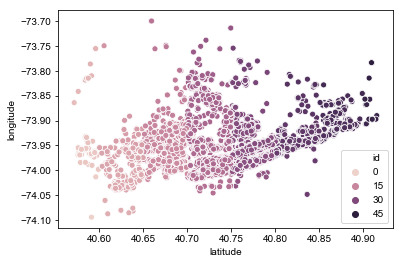

In [16]:
sns.scatterplot(x='latitude',y='longitude',data=lat_lon, hue='id')
sns.set_style('whitegrid')

In [17]:
lat_lon.shape, df.shape

((48300, 5), (48300, 35))

In [18]:
final_frame = pd.concat([df, lat_lon], axis=1)
final_frame.shape

(48300, 40)

In [19]:
final_frame.head(20)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,loft,garden_patio,common_outdoor_space,wheelchair_access,month,lon_bins,lat_bins,longitude,latitude,id
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,6,-73.95-73.91,40.70-40.74,-73.9425,40.7145,22
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,6,-74.00-73.96,40.75-40.79,-73.9667,40.7947,28
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,4,-74.05-74.01,40.70-40.74,-74.0018,40.7388,20
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,4,-74.00-73.96,40.75-40.79,-73.9677,40.7539,28
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,4,-73.95-73.91,40.80-40.84,-73.9493,40.8241,35
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,...,0,0,0,0,4,-74.05-74.01,40.70-40.74,-74.0028,40.7429,20
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,...,0,0,0,0,4,-74.00-73.96,40.80-40.84,-73.9660,40.8012,34
7,2.0,1,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,40.7427,-73.9957,5645,155 West 21st Street,low,...,0,0,0,0,4,-74.00-73.96,40.70-40.74,-73.9957,40.7427,21
8,1.0,1,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,40.8234,-73.9457,1725,63 Hamilton Terrace,medium,...,0,0,0,0,4,-73.95-73.91,40.80-40.84,-73.9457,40.8234,35
9,2.0,4,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,40.7278,-73.9808,5800,522 E 11th,low,...,0,0,0,0,4,-74.00-73.96,40.70-40.74,-73.9808,40.7278,21


In [20]:
train = final_frame[final_frame['month'] < 6]
test = final_frame[final_frame['month'] == 6]
train.shape, test.shape, df.shape

((31515, 40), (16785, 40), (48300, 35))

In [23]:
features = ['bathrooms', 'bedrooms','id','interest_level']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test MAE:', mean_absolute_error(y_test, y_pred))

Test MAE: 706.019374149522


C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [24]:
train = df[df['month'] < 6]
test = df[df['month'] == 6]
train.shape, test.shape, df.shape

((31515, 35), (16785, 35), (48300, 35))

In [118]:
from sklearn import metrics

features = ['bathrooms', 'bedrooms', 'longitude', 'interest_level',
       'elevator', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony', 'new_construction', 'terrace', 'wheelchair_access']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test MAE:', mean_absolute_error(y_test, y_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Test R^2:', metrics.r2_score(y_test, y_pred))
print('Train MAE:', mean_absolute_error(y_train, y_pred_train))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Train R^2:', metrics.r2_score(y_train, y_pred_train))

Test MAE: 590.6827591761686
Test RMSE: 843.6928860777591
Test R^2: 0.6404000435563728
Train MAE: 578.9594698700902
Train RMSE: 817.9423829070156
Train R^2: 0.657887716404494


C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nchib\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
